In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

filename = '../input/magic-telescope-dataset/MagicTelescope.csv'
usecols = ['fLength:', 'fWidth:', 'fSize:', 'fConc:', 'fConc1:',
       'fAsym:', 'fM3Long:', 'fM3Trans:', 'fAlpha:', 'fDist:', 'class:']
df = pd.read_csv(filepath_or_buffer=filename, usecols=usecols,)
df.columns = [column[:-1] for column in df.columns]
df.columns = [column[1:] if column.startswith('f') else column for column in df.columns]
df.describe()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [2]:
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

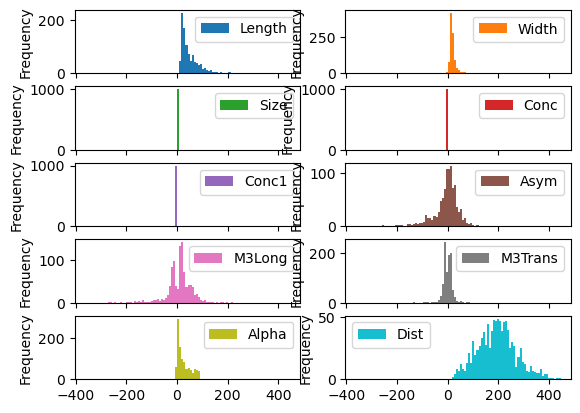

In [3]:
%matplotlib inline
# we can get the gist of the distributions with a sample
df.sample(1000)[df.columns[:-1]].plot.hist(legend=True, subplots=True, bins=100, layout=(5, 2))

<Axes: xlabel='Conc', ylabel='Conc1'>

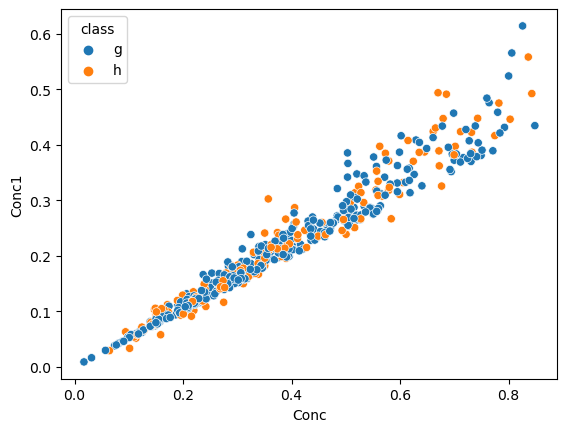

In [4]:
from seaborn import scatterplot
scatterplot(data=df.sample(500), x='Conc', y='Conc1', hue='class', )

<Axes: xlabel='M3Long', ylabel='M3Trans'>

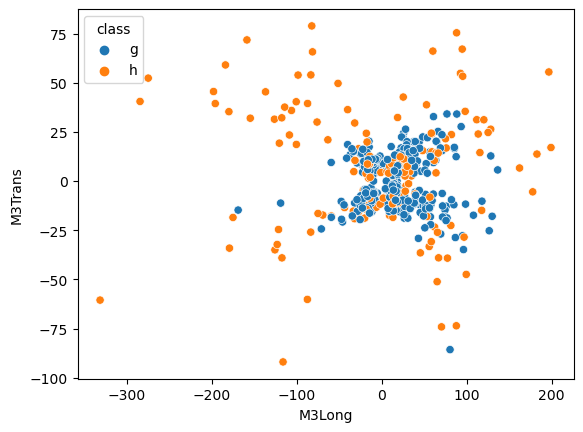

In [5]:
scatterplot(data=df.sample(500), x='M3Long', y='M3Trans', hue='class', )

In [6]:
from sklearn.model_selection import train_test_split

random_state = 1
test_size = 0.2
x = df[df.columns[:-1]].values
y = df['class'].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = random_state)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for model_name, model in {
    'logistic regression': LogisticRegression(max_iter=1000,)
}.items():
    model.fit(X=x_train, y=y_train)

    y_pred = model.predict(X=x_test)
    print('classifier: {}'.format(model_name))
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    print('accuracy is {:6.3f}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))
    print() # a blank line

classifier: logistic regression
              precision    recall  f1-score   support

           g       0.80      0.90      0.85      2499
           h       0.75      0.57      0.65      1305

    accuracy                           0.79      3804
   macro avg       0.77      0.74      0.75      3804
weighted avg       0.78      0.79      0.78      3804

[[2244  255]
 [ 557  748]]
accuracy is  0.787

